In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
alldata = pd.read_csv('../data/medications.csv')

In [3]:
alldata['COVERAGE_RATIO'] = (alldata['PAYER_COVERAGE']/ alldata['BASE_COST'])

# alldata.head(10)
alldata['START'] = pd.to_datetime(alldata['START'])

# print(len(alldata))

In [4]:
alldata.head()

,START,STOP,PATIENT,PAYER,ENCOUNTER,CODE,DESCRIPTION,BASE_COST,PAYER_COVERAGE,DISPENSES,TOTALCOST,REASONCODE,REASONDESCRIPTION,COVERAGE_RATIO
0,2014-09-18 09:23:28+00:00,2015-09-13T09:23:28Z,069b5064-ff05-2225-3995-f32685518bc6,d31fccc3-1767-390d-966a-22a5156f4219,d075672f-defd-db6f-0ffc-f47fb643b28c,748962,Camila 28 Day Pack,1374.45,1099.56,12,16493.40,NaN,NaN,0.8
1,2014-07-26 23:59:04+00:00,2015-08-01T23:59:04Z,7e65bfa0-5e3b-3515-52aa-bfdef74ffd71,26aab0cd-6aba-3e1b-ac5b-05c8867e762c,a98ccbf2-ec37-377d-0d17-7258705a5541,310798,Hydrochlorothiazide 25 MG Oral Tablet,0.82,0.00,4,3.28,59621000.0,Essential hypertension (disorder),0.0
2,2014-07-26 23:59:04+00:00,2015-08-01T23:59:04Z,7e65bfa0-5e3b-3515-52aa-bfdef74ffd71,26aab0cd-6aba-3e1b-ac5b-05c8867e762c,a98ccbf2-ec37-377d-0d17-7258705a5541,1049625,Acetaminophen 325 MG / Oxycodone Hydrochloride...,233.65,0.00,3,700.95,NaN,NaN,0.0
3,2014-07-26 23:59:04+00:00,2015-08-01T23:59:04Z,7e65bfa0-5e3b-3515-52aa-bfdef74ffd71,26aab0cd-6aba-3e1b-ac5b-05c8867e762c,a98ccbf2-ec37-377d-0d17-7258705a5541,209387,Acetaminophen 325 MG Oral Tablet [Tylenol],233.65,0.00,3,700.95,NaN,NaN,0.0
4,2014-07-26 23:59:04+00:00,2015-08-01T23:59:04Z,7e65bfa0-5e3b-3515-52aa-bfdef74ffd71,26aab0cd-6aba-3e1b-ac5b-05c8867e762c,a98ccbf2-ec37-377d-0d17-7258705a5541,351266,buprenorphine 2 MG / naloxone 0.5 MG Sublingua...,233.65,140.19,3,700.95,5602001.0,Opioid abuse (disorder),0.6


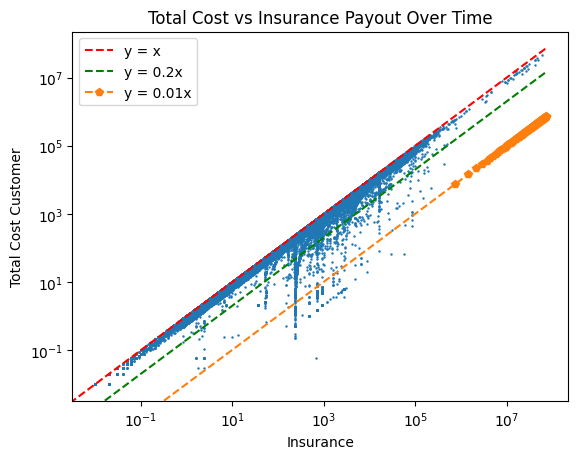

In [24]:
totalcost = alldata['TOTALCOST']

x_vals = np.linspace(min(totalcost), max(totalcost), 100)  # Generate x values


insurancepayout = totalcost * alldata['COVERAGE_RATIO']
plt.figure()
plt.plot(totalcost, insurancepayout, '.', ms = 1.5)
plt.plot(x_vals, x_vals, 'r--', label='y = x ')
# plt.plot(x_vals, 0.8 * x_vals , 'y--', label='y = 0.8x')
# plt.plot(x_vals, 0.6 * x_vals , 'k--', label='y = 0.6x')
plt.plot(x_vals, 0.2 * x_vals , 'g--', label='y = 0.2x')
plt.plot(x_vals, 0.01 * x_vals , 'p--', label='y = 0.01x')
plt.title('Total Cost vs Insurance Payout Over Time')
plt.ylabel('Total Cost Customer')
plt.xlabel('Insurance')
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.show()

In [ ]:
maxtotal = totalcost.max()
maxinsurance = insurancepayout.max()
print(maxtotal)
print(maxinsurance)

72340052.4
46409220.690000005
